In [5]:
import os
from typing import List

import numpy as np
import pandas as pd
from openai import AzureOpenAI


In [6]:
def get_embedding(input_data: List[str], model_name: str, dimension: int):
    """
    Generates embeddings for the given text using the specified language model.

    Args:
        input_data (List[str]): List of text inputs to generate embeddings for.
        model_name (str): Name of the language model.
        dimension (int): Dimensions of the embeddings output.

    Returns:
        List[List[float]]: List of embeddings generated for the input text.
    """
    client = AzureOpenAI(
        api_key=os.getenv("OPENAI_API_KEY"),
        api_version="2023-05-15",
        azure_endpoint=os.getenv("OPENAI_ENDPOINT"),
    )
    response = client.embeddings.create(
        input=input_data, model=model_name, dimensions=dimension
    ).model_dump()
    return [obj["embedding"] for obj in response["data"]]

In [13]:
coordinates = get_embedding(['Moan','Man Moans'], model_name='text-embedding-3-small', dimension=2)

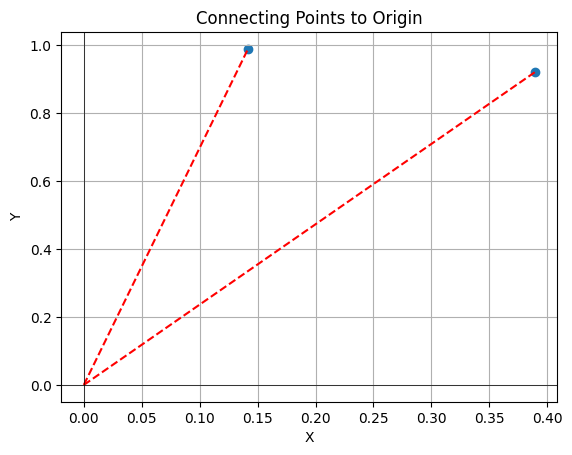

In [14]:
import matplotlib.pyplot as plt


# Extract x and y coordinates
x = [point[0] for point in coordinates]
y = [point[1] for point in coordinates]

# Plot points
plt.scatter(x, y)

# Plot lines from each point to the origin (0,0)
for point in coordinates:
    plt.plot([0, point[0]], [0, point[1]], 'r--')

plt.title('Connecting Points to Origin')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.show()
